## Genetic Algorithm Classification

This example demonstrates training a neural network classifier using a Genetic Algorithm (GA) via the `Perch` builder API.  
A simple MLP is trained on a synthetic binary classification dataset, with GA evolving model parameters through population-based search, mutation, and selection.

The builder manages model construction, data splitting, and optimizer configuration, while training progress is visualized using the built-in loss and accuracy plots.

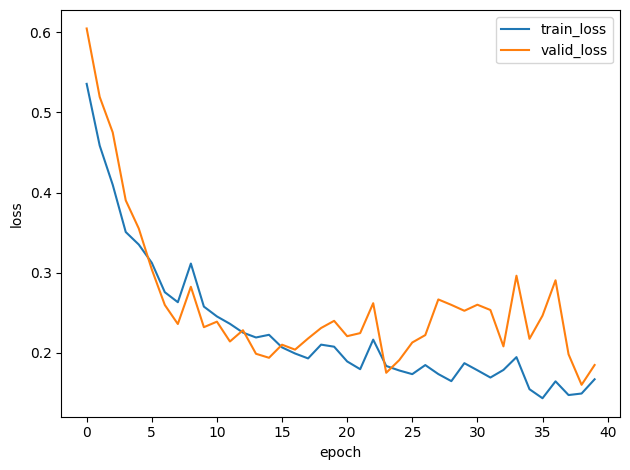

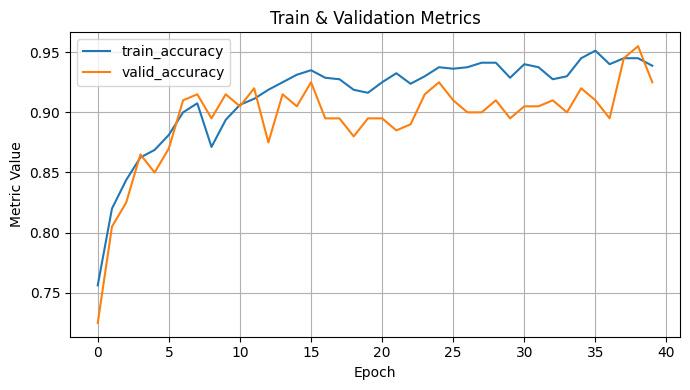

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from pyperch import Perch
from pyperch.models import SimpleMLP
from pyperch.utils import plot_losses, plot_metrics
from pyperch.core.metrics import Accuracy

# ------------------------------------------------------------
# Reproducibility
# ------------------------------------------------------------
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# ------------------------------------------------------------
# Dataset
# ------------------------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=12,
    n_informative=10,
    n_classes=2,
    random_state=seed,
)

X = X.astype(np.float32)
y = y.astype(np.int64)

# ------------------------------------------------------------
# Build GA experiment
# ------------------------------------------------------------
perch = (
    Perch()
    .model(
        SimpleMLP,
        input_dim=12,
        hidden=[32],
        output_dim=2,
        activation="relu",
        loss_fn=nn.CrossEntropyLoss(),
    )
    .optimizer(
        "ga",
        population_size=250,
        mutation_rate=0.05,
        step_size=0.05,
    )
    .metrics(Accuracy())
    .data(
        X,
        y,
        batch_size=64,
        valid_split=0.2,
        stratify=True,
        normalize=None,
    )
)

# ------------------------------------------------------------
# Train
# ------------------------------------------------------------
trainer, history = perch.train(
    max_epochs=40,
    seed=seed,
    optimizer_mode="per_epoch",
)

# ------------------------------------------------------------
# Plots
# ------------------------------------------------------------
plot_losses(history)
plt.show()

plot_metrics(history)
plt.show()


## Genetic Algorithm Regression

This example demonstrates applying the GA optimizer to a regression task using the `Perch` builder API.  A simple MLP regressor is trained on a synthetic dataset, with GA optimizing model parameters through population-based evolution rather than gradient descent.

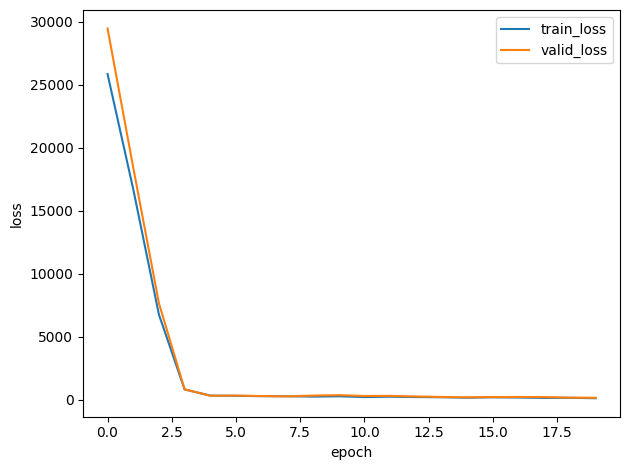

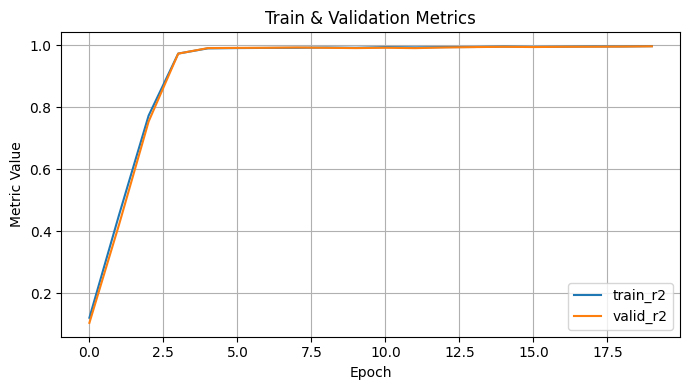

In [2]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from pyperch import Perch
from pyperch.models import SimpleMLP
from pyperch.core.metrics import MSE, R2
from pyperch.utils import plot_losses, plot_metrics

# ------------------------------------------------------------
# Repro
# ------------------------------------------------------------
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# ------------------------------------------------------------
# Dataset
# ------------------------------------------------------------
X, y = make_regression(
    n_samples=1000,
    n_features=12,
    n_informative=10,
    noise=0.2,
    random_state=seed,
)

X = X.astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)

# ------------------------------------------------------------
# GA Regression Builder
# ------------------------------------------------------------
perch = (
    Perch()
    .model(
        SimpleMLP,
        input_dim=12,
        hidden=[32],
        output_dim=1,
        activation="leaky_relu",  
    )
    .optimizer(
        "ga",
        population_size=60,
        mutation_rate=0.15,
        step_size=0.1,
    )
    .metrics(R2())
    .data(
        X,
        y,
        batch_size=64,
        valid_split=0.2,
        stratify=False,
        normalize=None,
    )
)

# ------------------------------------------------------------
# Train
# ------------------------------------------------------------
trainer, history = perch.train(
    max_epochs=20,
    seed=seed,
    optimizer_mode="per_batch",
)

# ------------------------------------------------------------
# Plots (Loss + Metrics)
# ------------------------------------------------------------
plot_losses(history)
plt.show()

plot_metrics(history)
plt.show()